In [1]:
import pennylane as qml
from pennylane import qaoa
from pennylane import numpy as np
from matplotlib import pyplot as plt
from qiskit import *
import networkx as nx

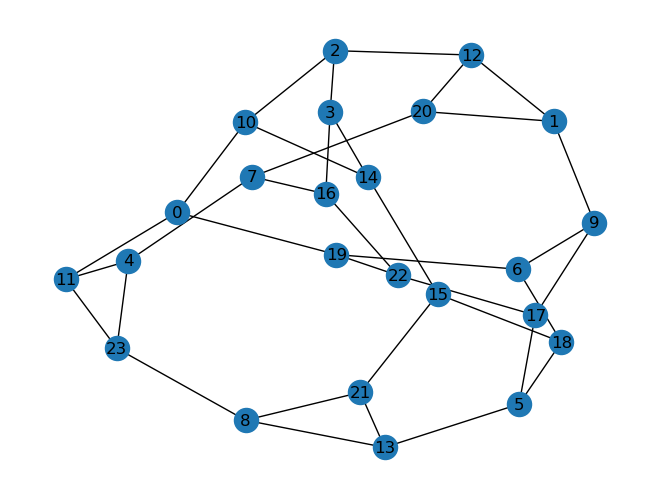

In [2]:
qubits = 24
graph = nx.random_regular_graph(3, qubits, seed=722)

nx.draw(graph, with_labels=True)
plt.show()

In [3]:
cost_h, mixer_h = qaoa.maxcut(graph)

print("Cost Hamiltonian", cost_h)
print("Mixer Hamiltonian", mixer_h)

Cost Hamiltonian   (-18.0) [I15]
+ (0.5) [Z15 Z21]
+ (0.5) [Z15 Z14]
+ (0.5) [Z15 Z18]
+ (0.5) [Z21 Z8]
+ (0.5) [Z21 Z13]
+ (0.5) [Z6 Z18]
+ (0.5) [Z6 Z19]
+ (0.5) [Z6 Z9]
+ (0.5) [Z18 Z5]
+ (0.5) [Z7 Z20]
+ (0.5) [Z7 Z16]
+ (0.5) [Z7 Z4]
+ (0.5) [Z20 Z1]
+ (0.5) [Z20 Z12]
+ (0.5) [Z3 Z16]
+ (0.5) [Z3 Z14]
+ (0.5) [Z3 Z2]
+ (0.5) [Z16 Z22]
+ (0.5) [Z5 Z13]
+ (0.5) [Z5 Z17]
+ (0.5) [Z13 Z8]
+ (0.5) [Z9 Z17]
+ (0.5) [Z9 Z1]
+ (0.5) [Z17 Z22]
+ (0.5) [Z8 Z23]
+ (0.5) [Z1 Z12]
+ (0.5) [Z0 Z11]
+ (0.5) [Z0 Z10]
+ (0.5) [Z0 Z19]
+ (0.5) [Z11 Z23]
+ (0.5) [Z11 Z4]
+ (0.5) [Z23 Z4]
+ (0.5) [Z12 Z2]
+ (0.5) [Z22 Z19]
+ (0.5) [Z14 Z10]
+ (0.5) [Z10 Z2]
Mixer Hamiltonian   (1) [X15]
+ (1) [X21]
+ (1) [X6]
+ (1) [X18]
+ (1) [X7]
+ (1) [X20]
+ (1) [X3]
+ (1) [X16]
+ (1) [X5]
+ (1) [X13]
+ (1) [X9]
+ (1) [X17]
+ (1) [X8]
+ (1) [X1]
+ (1) [X0]
+ (1) [X11]
+ (1) [X23]
+ (1) [X12]
+ (1) [X22]
+ (1) [X4]
+ (1) [X14]
+ (1) [X10]
+ (1) [X19]
+ (1) [X2]


In [4]:
def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(alpha, mixer_h)

In [5]:
wires = range(qubits)
depth = 2

def circuit(params, **kwargs):
    for w in wires:
        qml.Hadamard(wires=w)
    qml.layer(qaoa_layer, depth, params[0], params[1])

In [6]:
dev = qml.device("qiskit.aer", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)

In [7]:
params = np.array([[0.5] * depth, [0.5] * depth], requires_grad=True)

In [8]:
cost_function(params)

array(-13.25488281)

In [9]:
QuantumCircuit.count_ops(dev._circuit)

OrderedDict([('cx', 144), ('h', 120), ('rz', 120), ('measure', 24)])

In [10]:
# print the number of total gates

print("Total number of gates: ", sum(QuantumCircuit.count_ops(dev._circuit).values()))

Total number of gates:  408


In [11]:
# print the number of two qubit gates, i.e. cx gates + rz gates

print("Number of two qubit gates: ", QuantumCircuit.count_ops(dev._circuit)['cx'] + QuantumCircuit.count_ops(dev._circuit)['rz'])

Number of two qubit gates:  264


In [12]:
dev._circuit.qasm(formatted=True, filename="./raw_qasm/qaoa_n{}_from_python.qasm".format(qubits))

OPENQASM 2.0;
include "qelib1.inc";
qreg q[24];
creg c[24];
h q[0];
h q[1];
h q[2];
h q[3];
h q[4];
h q[5];
h q[6];
h q[7];
h q[8];
h q[9];
h q[10];
h q[11];
h q[12];
h q[13];
h q[14];
h q[15];
h q[16];
h q[17];
h q[18];
h q[19];
h q[20];
h q[21];
h q[22];
h q[23];
cx q[21],q[15];
rz(0.5) q[15];
cx q[21],q[15];
cx q[14],q[15];
rz(0.5) q[15];
cx q[14],q[15];
cx q[18],q[15];
rz(0.5) q[15];
cx q[18],q[15];
cx q[8],q[21];
rz(0.5) q[21];
cx q[8],q[21];
cx q[13],q[21];
rz(0.5) q[21];
cx q[13],q[21];
cx q[18],q[6];
rz(0.5) q[6];
cx q[18],q[6];
cx q[19],q[6];
rz(0.5) q[6];
cx q[19],q[6];
cx q[9],q[6];
rz(0.5) q[6];
cx q[9],q[6];
cx q[5],q[18];
rz(0.5) q[18];
cx q[5],q[18];
cx q[20],q[7];
rz(0.5) q[7];
cx q[20],q[7];
cx q[16],q[7];
rz(0.5) q[7];
cx q[16],q[7];
cx q[4],q[7];
rz(0.5) q[7];
cx q[4],q[7];
cx q[1],q[20];
rz(0.5) q[20];
cx q[1],q[20];
cx q[12],q[20];
rz(0.5) q[20];
cx q[12],q[20];
cx q[16],q[3];
rz(0.5) q[3];
cx q[16],q[3];
cx q[14],q[3];
rz(0.5) q[3];
cx q[14],q[3];
cx q[2],q[3];
rz